In [148]:
import requests
import pandas as pd 
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
# import relevant libraries
# Welcome to Group 2

# API part

## members of API part

YUNPENG LU(2014873)

JIAOHAO SHANG(2087608)

XINAN LI(2090506)

## State

In [2]:
location_url1 = "https://localcoviddata.com/covid19/v1/cases/jhu?state="
# first part of url
location_url2= "&daysInPast=7"
# second part of url
def location_generator(query="AL"):
    # default state = 'Alabama', whose state_code is 'AL'
    # We should note that the query should be the state_code of the state, rather than full name of the state
    query = query.replace(" ", "%20")
    # replace space with '%20'
    r = requests.get(location_url1 + query + location_url2)
    # equals to https://localcoviddata.com/covid19/v1/cases/jhu?state=AL&daysInPast=7, 
    # which will return the covid data in last 7 days of Alabama
    return r

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
df = pd.read_csv(url)
# df represents all the data of every name of state and county
df.head()

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region       Lat  \
0    4   AF  AFG    4.0   NaN    NaN            NaN    Afghanistan  33.93911   
1    8   AL  ALB    8.0   NaN    NaN            NaN        Albania  41.15330   
2   12   DZ  DZA   12.0   NaN    NaN            NaN        Algeria  28.03390   
3   20   AD  AND   20.0   NaN    NaN            NaN        Andorra  42.50630   
4   24   AO  AGO   24.0   NaN    NaN            NaN         Angola -11.20270   

       Long_ Combined_Key  Population  
0  67.709953  Afghanistan  38928341.0  
1  20.168300      Albania   2877800.0  
2   1.659600      Algeria  43851043.0  
3   1.521800      Andorra     77265.0  
4  17.873900       Angola  32866268.0

In [4]:
df_state = df.iloc[968:1019,:]
# 968 to 1019 lines of this document represents the data of every state and its state_code
df_state

UID iso2 iso3  code3     FIPS     Admin2        Province_State  \
968   84080001   US  USA  840.0  80001.0  Out of AL               Alabama   
969   84080002   US  USA  840.0  80002.0  Out of AK                Alaska   
970   84080004   US  USA  840.0  80004.0  Out of AZ               Arizona   
971   84080005   US  USA  840.0  80005.0  Out of AR              Arkansas   
972   84080006   US  USA  840.0  80006.0  Out of CA            California   
973   84080008   US  USA  840.0  80008.0  Out of CO              Colorado   
974   84080009   US  USA  840.0  80009.0  Out of CT           Connecticut   
975   84080010   US  USA  840.0  80010.0  Out of DE              Delaware   
976   84080011   US  USA  840.0  80011.0  Out of DC  District of Columbia   
977   84080012   US  USA  840.0  80012.0  Out of FL               Florida   
978   84080013   US  USA  840.0  80013.0  Out of GA               Georgia   
979   84080015   US  USA  840.0  80015.0  Out of HI                Hawaii   
980   84080016   US  USA  840.0  80016.0  Out of ID                 Idaho   
981   84080017   US  USA  840.0  80017.0  Out of IL              Illinois   
982   84080018   US  USA  840.0  80018.0  Out of IN               Indiana   
983   84080019   US  USA  840.0  80019.0  Out of IA                  Iowa   
984   84080020   US  USA  840.0  80020.0  Out of KS                Kansas   
985   84080021   US  USA  840.0  80021.0  Out of KY              Kentucky   
986   84080022   US  USA  840.0  80022.0  Out of LA             Louisiana   
987   84080023   US  USA  840.0  80023.0  Out of ME                 Maine   
988   84080024   US  USA  840.0  80024.0  Out of MD              Maryland   
989   84080025   US  USA  840.0  80025.0  Out of MA         Massachusetts   
990   84080026   US  USA  840.0  80026.0  Out of MI              Michigan   
991   84080027   US  USA  840.0  80027.0  Out of MN             Minnesota   
992   84080028   US  USA  840.0  80028.0  Out of MS           Mississippi   
993   84080029   US  USA  840.0  80029.0  Out of MO              Missouri   
994   84080030   US  USA  840.0  80030.0  Out of MT               Montana   
995   84080031   US  USA  840.0  80031.0  Out of NE              Nebraska   
996   84080032   US  USA  840.0  80032.0  Out of NV                Nevada   
997   84080033   US  USA  840.0  80033.0  Out of NH         New Hampshire   
998   84080034   US  USA  840.0  80034.0  Out of NJ            New Jersey   
999   84080035   US  USA  840.0  80035.0  Out of NM            New Mexico   
1000  84080036   US  USA  840.0  80036.0  Out of NY              New York   
1001  84080037   US  USA  840.0  80037.0  Out of NC        North Carolina   
1002  84080038   US  USA  840.0  80038.0  Out of ND          North Dakota   
1003  84080039   US  USA  840.0  80039.0  Out of OH                  Ohio   
1004  84080040   US  USA  840.0  80040.0  Out of OK              Oklahoma   
1005  84080041   US  USA  840.0  80041.0  Out of OR                Oregon   
1006  84080042   US  USA  840.0  80042.0  Out of PA          Pennsylvania   
1007  84080044   US  USA  840.0  80044.0  Out of RI          Rhode Island   
1008  84080045   US  USA  840.0  80045.0  Out of SC        South Carolina   
1009  84080046   US  USA  840.0  80046.0  Out of SD          South Dakota   
1010  84080047   US  USA  840.0  80047.0  Out of TN             Tennessee   
1011  84080048   US  USA  840.0  80048.0  Out of TX                 Texas   
1012  84080049   US  USA  840.0  80049.0  Out of UT                  Utah   
1013  84080050   US  USA  840.0  80050.0  Out of VT               Vermont   
1014  84080051   US  USA  840.0  80051.0  Out of VA              Virginia   
1015  84080053   US  USA  840.0  80053.0  Out of WA            Washington   
1016  84080054   US  USA  840.0  80054.0  Out of WV         West Virginia   
1017  84080055   US  USA  840.0  80055.0  Out of WI             Wisconsin   
1018  84080056   US  USA  840.0  80056.0  Out of WY               Wyoming   

     C

In [5]:
def f(x):
    return x['Admin2'].split(' ')[2]
df_state['state_code'] = df_state.apply(lambda x:f(x),axis = 1)
# f(x) function is used to extract the useful part of Admin2, which represents the state_code of every state
# for example, 'AL' is the state_code of Alabama

<ipython-input-5-3f1ed0364cfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['state_code'] = df_state.apply(lambda x:f(x),axis = 1)


In [6]:
df_state = df_state.reset_index(drop = True)
df_state
# we generate a new column named state_code, which is easier to find relevant data in the website

UID iso2 iso3  code3     FIPS     Admin2        Province_State  \
0   84080001   US  USA  840.0  80001.0  Out of AL               Alabama   
1   84080002   US  USA  840.0  80002.0  Out of AK                Alaska   
2   84080004   US  USA  840.0  80004.0  Out of AZ               Arizona   
3   84080005   US  USA  840.0  80005.0  Out of AR              Arkansas   
4   84080006   US  USA  840.0  80006.0  Out of CA            California   
5   84080008   US  USA  840.0  80008.0  Out of CO              Colorado   
6   84080009   US  USA  840.0  80009.0  Out of CT           Connecticut   
7   84080010   US  USA  840.0  80010.0  Out of DE              Delaware   
8   84080011   US  USA  840.0  80011.0  Out of DC  District of Columbia   
9   84080012   US  USA  840.0  80012.0  Out of FL               Florida   
10  84080013   US  USA  840.0  80013.0  Out of GA               Georgia   
11  84080015   US  USA  840.0  80015.0  Out of HI                Hawaii   
12  84080016   US  USA  840.0  80016.0  Out of ID                 Idaho   
13  84080017   US  USA  840.0  80017.0  Out of IL              Illinois   
14  84080018   US  USA  840.0  80018.0  Out of IN               Indiana   
15  84080019   US  USA  840.0  80019.0  Out of IA                  Iowa   
16  84080020   US  USA  840.0  80020.0  Out of KS                Kansas   
17  84080021   US  USA  840.0  80021.0  Out of KY              Kentucky   
18  84080022   US  USA  840.0  80022.0  Out of LA             Louisiana   
19  84080023   US  USA  840.0  80023.0  Out of ME                 Maine   
20  84080024   US  USA  840.0  80024.0  Out of MD              Maryland   
21  84080025   US  USA  840.0  80025.0  Out of MA         Massachusetts   
22  84080026   US  USA  840.0  80026.0  Out of MI              Michigan   
23  84080027   US  USA  840.0  80027.0  Out of MN             Minnesota   
24  84080028   US  USA  840.0  80028.0  Out of MS           Mississippi   
25  84080029   US  USA  840.0  80029.0  Out of MO              Missouri   
26  84080030   US  USA  840.0  80030.0  Out of MT               Montana   
27  84080031   US  USA  840.0  80031.0  Out of NE              Nebraska   
28  84080032   US  USA  840.0  80032.0  Out of NV                Nevada   
29  84080033   US  USA  840.0  80033.0  Out of NH         New Hampshire   
30  84080034   US  USA  840.0  80034.0  Out of NJ            New Jersey   
31  84080035   US  USA  840.0  80035.0  Out of NM            New Mexico   
32  84080036   US  USA  840.0  80036.0  Out of NY              New York   
33  84080037   US  USA  840.0  80037.0  Out of NC        North Carolina   
34  84080038   US  USA  840.0  80038.0  Out of ND          North Dakota   
35  84080039   US  USA  840.0  80039.0  Out of OH                  Ohio   
36  84080040   US  USA  840.0  80040.0  Out of OK              Oklahoma   
37  84080041   US  USA  840.0  80041.0  Out of OR                Oregon   
38  84080042   US  USA  840.0  80042.0  Out of PA          Pennsylvania   
39  84080044   US  USA  840.0  80044.0  Out of RI          Rhode Island   
40  84080045   US  USA  840.0  80045.0  Out of SC        South Carolina   
41  84080046   US  USA  840.0  80046.0  Out of SD          South Dakota   
42  84080047   US  USA  840.0  80047.0  Out of TN             Tennessee   
43  84080048   US  USA  840.0  80048.0  Out of TX                 Texas   
44  84080049   US  USA  840.0  80049.0  Out of UT                  Utah   
45  84080050   US  USA  840.0  80050.0  Out of VT               Vermont   
46  84080051   US  USA  840.0  80051.0  Out of VA              Virginia   
47  84080053   US  USA  840.0  80053.0  Out of WA            Washington   
48  84080054   US  USA  840.0  80054.0  Out of WV         West Virginia   
49  84080055   US  USA  840.0  80055.0  Out of WI             Wisconsin   
50  84080056   US  USA  840.0  80056.0  Out of WY               Wyoming   

   Country_Region  Lat  Long_                         Combined_Key  \
0              US  NaN    NaN         

In [7]:
df_state.to_csv('location_state.csv')
# which could generate a csv file in the current file path

In [8]:
# location_generator(query = df_state.loc[3,'state_code']).json()['historicData']

In [9]:
data_state = {}
# create a dict to save the data of every state
for row in range(df_state.shape[0]):
    if df_state.loc[row,'state_code'] != 'DC':
    # 'DC' is not a state of US now because of some political problems... just drop the data of DC state
        r = location_generator(query = df_state.loc[row,'state_code'])
        result = r.json()['historicData']
        data_state[df_state.loc[row,'Province_State']] = result

        # data_state save relevant data of every state

In [10]:
print(len(data_state))
# 50 states of US(except DC state), we are successful!
print(data_state)

50
{'Alabama': [{'provinceStateName': 'Alabama', 'peoplePositiveCasesCt': 921175, 'deathCt': 16496, 'date': '2022-01-04'}, {'provinceStateName': 'Alabama', 'peoplePositiveCasesCt': 932250, 'deathCt': 16503, 'date': '2022-01-05'}, {'provinceStateName': 'Alabama', 'peoplePositiveCasesCt': 944876, 'deathCt': 16543, 'date': '2022-01-06'}, {'provinceStateName': 'Alabama', 'peoplePositiveCasesCt': 957848, 'deathCt': 16585, 'date': '2022-01-07'}, {'provinceStateName': 'Alabama', 'peoplePositiveCasesCt': 966180, 'deathCt': 16624, 'date': '2022-01-08'}, {'provinceStateName': 'Alabama', 'peoplePositiveCasesCt': 978632, 'deathCt': 16624, 'date': '2022-01-09'}], 'Alaska': [{'provinceStateName': 'Alaska', 'peoplePositiveCasesCt': 160089, 'deathCt': 979, 'date': '2022-01-04'}, {'provinceStateName': 'Alaska', 'peoplePositiveCasesCt': 161678, 'deathCt': 979, 'date': '2022-01-05'}, {'provinceStateName': 'Alaska', 'peoplePositiveCasesCt': 161678, 'deathCt': 979, 'date': '2022-01-06'}, {'provinceStateNam

In [11]:
data = pd.DataFrame(columns = ['provinceStateName', 'peoplePositiveCasesCt', 'deathCt', 'date'])
# create a blank dataframe in order to save data in the form of dict

In [12]:
for state in data_state:
    data = pd.concat([data,pd.DataFrame(data_state[state])])
    # Since we can only extract the data of one state once time, so we need to use for-loop function
    # pd.concat function is used to concat different dataframe vertically

In [13]:
state_data = data.reset_index(drop = True)
state_data
# reset the index of the state, from 0 to 299

provinceStateName peoplePositiveCasesCt deathCt        date
0             Alabama                921175   16496  2022-01-04
1             Alabama                932250   16503  2022-01-05
2             Alabama                944876   16543  2022-01-06
3             Alabama                957848   16585  2022-01-07
4             Alabama                966180   16624  2022-01-08
..                ...                   ...     ...         ...
295           Wyoming                118098    1572  2022-01-05
296           Wyoming                119093    1572  2022-01-06
297           Wyoming                119857    1572  2022-01-07
298           Wyoming                119857    1572  2022-01-08
299           Wyoming                119857    1572  2022-01-09

[300 rows x 4 columns]

In [14]:
state_data.to_csv('data_state.csv')
# save state_data

## county

In [15]:
df_county = df.iloc[1070:,:]
# 1070 lines of this document represents the data of every county and its state_name
df_county

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
1070  84001001   US  USA  840.0   1001.0     Autauga        Alabama   
1071  84001003   US  USA  840.0   1003.0     Baldwin        Alabama   
1072  84001005   US  USA  840.0   1005.0     Barbour        Alabama   
1073  84001007   US  USA  840.0   1007.0        Bibb        Alabama   
1074  84001009   US  USA  840.0   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
4209  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4210  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4211  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4212  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4213  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
1070             US  32.539527  -86.644082     Autauga, Alabama, US   
1071             US  30.727750  -87.722071     Baldwin, Alabama, US   
1072             US  31.868263  -85.387129     Barbour, Alabama, US   
1073             US  32.996421  -87.125115        Bibb, Alabama, US   
1074             US  33.982109  -86.567906      Blount, Alabama, US   
...             ...        ...         ...                      ...   
4209             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4210             US  43.935225 -110.589080       Teton, Wyoming, US   
4211             US  41.287818 -110.547578       Uinta, Wyoming, US   
4212             US  43.904516 -107.680187    Washakie, Wyoming, US   
4213             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
1070     55869.0  
1071    223234.0  
1072     24686.0  
1073     22394.0  
1074     57826.0  
...          ...  
4209     42343.0  
4210     23464.0  
4211     20226.0  
4212      7805.0  
4213      6927.0  

[3144 rows x 12 columns]

In [16]:
df_county = df_county.reset_index(drop = True)
df_county
# reset_index is easier for subsequent data operations

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA  840.0   1001.0     Autauga        Alabama   
1     84001003   US  USA  840.0   1003.0     Baldwin        Alabama   
2     84001005   US  USA  840.0   1005.0     Barbour        Alabama   
3     84001007   US  USA  840.0   1007.0        Bibb        Alabama   
4     84001009   US  USA  840.0   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3139  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
3140  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
3141  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
3142  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
3143  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0                US  32.539527  -86.644082     Autauga, Alabama, US   
1                US  30.727750  -87.722071     Baldwin, Alabama, US   
2                US  31.868263  -85.387129     Barbour, Alabama, US   
3                US  32.996421  -87.125115        Bibb, Alabama, US   
4                US  33.982109  -86.567906      Blount, Alabama, US   
...             ...        ...         ...                      ...   
3139             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
3140             US  43.935225 -110.589080       Teton, Wyoming, US   
3141             US  41.287818 -110.547578       Uinta, Wyoming, US   
3142             US  43.904516 -107.680187    Washakie, Wyoming, US   
3143             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0        55869.0  
1       223234.0  
2        24686.0  
3        22394.0  
4        57826.0  
...          ...  
3139     42343.0  
3140     23464.0  
3141     20226.0  
3142      7805.0  
3143      6927.0  

[3144 rows x 12 columns]

In [17]:
df_county.to_csv('location_county.csv')
# save data of county to csv file

In [18]:
# data_state = {}

In [19]:
dict_state = {}
# create a new dict in order to build a connection between state_code and state full name

In [20]:
df_state.head()
# we need to use 2 columns df_state, Province_State and state_code

UID iso2 iso3  code3     FIPS     Admin2 Province_State  \
0  84080001   US  USA  840.0  80001.0  Out of AL        Alabama   
1  84080002   US  USA  840.0  80002.0  Out of AK         Alaska   
2  84080004   US  USA  840.0  80004.0  Out of AZ        Arizona   
3  84080005   US  USA  840.0  80005.0  Out of AR       Arkansas   
4  84080006   US  USA  840.0  80006.0  Out of CA     California   

  Country_Region  Lat  Long_               Combined_Key  Population state_code  
0             US  NaN    NaN     Out of AL, Alabama, US         NaN         AL  
1             US  NaN    NaN      Out of AK, Alaska, US         NaN         AK  
2             US  NaN    NaN     Out of AZ, Arizona, US         NaN         AZ  
3             US  NaN    NaN    Out of AR, Arkansas, US         NaN         AR  
4             US  NaN    NaN  Out of CA, California, US         NaN         CA

In [21]:
for row in range(df_state.shape[0]):
    state_code = df_state.loc[row,'state_code']
    # extract the state_code
    state_name = df_state.loc[row,'Province_State']
    # extract the state full name
    dict_state[state_name] = state_code
    # built the connection between state_code and state full name, we can look up the state_code use the state full name key in dict_state
#     tmp = pd.concat([tmp,pd.DataFrame(df_county[df_county.Province_State == each])])

In [22]:
dict_state

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [23]:
location_url1 = "https://localcoviddata.com/covid19/v1/cases/jhu?state="
location_url2= "&daysInPast=7&county="

def location_generator_county(state="AL",county="Autauga"):
    state = state.replace(" ", "%20")
    county = county.replace(" ", "%20")
    r = requests.get(location_url1 + state + location_url2 + county)
    return r
    # equals to https://localcoviddata.com/covid19/v1/cases/jhu?state=AL&daysInPast=7&county=Autauga, 
    # which will return the covid data in last 7 days of Autauga of Alabama

In [24]:
result = {}
# save the covid data of different county to dict

In [25]:
for row in range(df_county.shape[0]):
    # search every line of df_county
    state_name = df_county.loc[row,'Province_State']
    state_code = dict_state[state_name]
    # return the state_code of every line
    county = df_county.loc[row,'Admin2']
    # return the county name
    try:
        r = location_generator_county(state_code,county)
        result[state_name + '-' + county] = r.json()['historicData']
        # the key is named to [state_name + '-' + county], for example: Alabama-Autauga, 
        # because I found that there will be the same county name of different state.
    except:
        pass
    # using try except function here because there's some unknown problems to county name..
    # Maybe will drop 2 lines of data, but we have 3142 lines of data totally. 

In [26]:
result

{'Alabama-Autauga': [{'provinceStateName': 'Alabama',
   'deathCt': 161,
   'peoplePositiveCasesCt': 11347,
   'countryShortName': 'US',
   'date': '2022-01-04'},
  {'provinceStateName': 'Alabama',
   'deathCt': 161,
   'peoplePositiveCasesCt': 11478,
   'countryShortName': 'US',
   'date': '2022-01-05'},
  {'provinceStateName': 'Alabama',
   'deathCt': 161,
   'peoplePositiveCasesCt': 11638,
   'countryShortName': 'US',
   'date': '2022-01-06'},
  {'provinceStateName': 'Alabama',
   'deathCt': 162,
   'peoplePositiveCasesCt': 11789,
   'countryShortName': 'US',
   'date': '2022-01-07'},
  {'provinceStateName': 'Alabama',
   'deathCt': 162,
   'peoplePositiveCasesCt': 11856,
   'countryShortName': 'US',
   'date': '2022-01-08'},
  {'provinceStateName': 'Alabama',
   'deathCt': 162,
   'peoplePositiveCasesCt': 11975,
   'countryShortName': 'US',
   'date': '2022-01-09'}],
 'Alabama-Baldwin': [{'provinceStateName': 'Alabama',
   'deathCt': 594,
   'peoplePositiveCasesCt': 40838,
   'coun

In [27]:
print(len(result))
# we have saved the data of 3142 counties!

3142


In [28]:
county_data = pd.DataFrame(columns = ['provinceStateName', 'deathCt', 'peoplePositiveCasesCt','countryShortName', 'date', 'state-county'])
county_data
# build a blank dataframe in order to concat data of diffrent counties

Empty DataFrame
Columns: [provinceStateName, deathCt, peoplePositiveCasesCt, countryShortName, date, state-county]
Index: []

In [30]:
for county in result:
    tmp_df = pd.DataFrame(result[county])
    tmp_df['state-county'] = county
    county_data = pd.concat([county_data,tmp_df])
    # we saved the data of every county to tmp in the form of dataframe

In [32]:
county_data = county_data.reset_index(drop = True)
county_data

provinceStateName deathCt peoplePositiveCasesCt countryShortName  \
0               Alabama     161                 11347               US   
1               Alabama     161                 11478               US   
2               Alabama     161                 11638               US   
3               Alabama     162                 11789               US   
4               Alabama     162                 11856               US   
...                 ...     ...                   ...              ...   
18847           Wyoming      16                  1260               US   
18848           Wyoming      16                  1261               US   
18849           Wyoming      16                  1263               US   
18850           Wyoming      16                  1263               US   
18851           Wyoming      16                  1263               US   

             date     state-county  
0      2022-01-04  Alabama-Autauga  
1      2022-01-05  Alabama-Autauga  
2      2022-01-06  Alabama-Autauga  
3      2022-01-07  Alabama-Autauga  
4      2022-01-08  Alabama-Autauga  
...           ...              ...  
18847  2022-01-05   Wyoming-Weston  
18848  2022-01-06   Wyoming-Weston  
18849  2022-01-07   Wyoming-Weston  
18850  2022-01-08   Wyoming-Weston  
18851  2022-01-09   Wyoming-Weston  

[18852 rows x 6 columns]

In [34]:
county_data.to_csv('data_county.csv')
# save the data of county

## population

In [35]:
# This API is provided by Data USA and Deloitte and has the endpoint to state populations data:

url = "https://datausa.io/api/data?drilldowns=State&measures=Population"
r = requests.get(url)
result = r.json()
result
# we have downloaded the population of all states from 2013 to 2019

{'data': [{'ID State': '04000US01',
   'State': 'Alabama',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 4903185,
   'Slug State': 'alabama'},
  {'ID State': '04000US02',
   'State': 'Alaska',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 731545,
   'Slug State': 'alaska'},
  {'ID State': '04000US04',
   'State': 'Arizona',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 7278717,
   'Slug State': 'arizona'},
  {'ID State': '04000US05',
   'State': 'Arkansas',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 3017804,
   'Slug State': 'arkansas'},
  {'ID State': '04000US06',
   'State': 'California',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 39512223,
   'Slug State': 'california'},
  {'ID State': '04000US08',
   'State': 'Colorado',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 5758736,
   'Slug State': 'colorado'},
  {'ID State': '04000US09',
   'State': 'Connecticut',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 356

In [36]:
# Using pandas directly generate a dataframe
df = pd.DataFrame(result['data'])
df

ID State          State  ID Year  Year  Population     Slug State
0    04000US01        Alabama     2019  2019     4903185        alabama
1    04000US02         Alaska     2019  2019      731545         alaska
2    04000US04        Arizona     2019  2019     7278717        arizona
3    04000US05       Arkansas     2019  2019     3017804       arkansas
4    04000US06     California     2019  2019    39512223     california
..         ...            ...      ...   ...         ...            ...
359  04000US53     Washington     2013  2013     6971406     washington
360  04000US54  West Virginia     2013  2013     1854304  west-virginia
361  04000US55      Wisconsin     2013  2013     5742713      wisconsin
362  04000US56        Wyoming     2013  2013      582658        wyoming
363  04000US72    Puerto Rico     2013  2013     3615086    puerto-rico

[364 rows x 6 columns]

In [37]:
# Only need the latest number of population, which is 2019.
# The population number in Puerto Rico is excluded as it does not relevant to the first API.
# we kept the suitable data, which should be from 2019(latest) and not be the Puerto Rico(not a state)
df_population_2019 = df[(df['Year'] == '2019') & (df['State'] != 'Puerto Rico')]
df_population_2019

ID State                 State  ID Year  Year  Population  \
0   04000US01               Alabama     2019  2019     4903185   
1   04000US02                Alaska     2019  2019      731545   
2   04000US04               Arizona     2019  2019     7278717   
3   04000US05              Arkansas     2019  2019     3017804   
4   04000US06            California     2019  2019    39512223   
5   04000US08              Colorado     2019  2019     5758736   
6   04000US09           Connecticut     2019  2019     3565287   
7   04000US10              Delaware     2019  2019      973764   
8   04000US11  District of Columbia     2019  2019      705749   
9   04000US12               Florida     2019  2019    21477737   
10  04000US13               Georgia     2019  2019    10617423   
11  04000US15                Hawaii     2019  2019     1415872   
12  04000US16                 Idaho     2019  2019     1787065   
13  04000US17              Illinois     2019  2019    12671821   
14  04000US18               Indiana     2019  2019     6732219   
15  04000US19                  Iowa     2019  2019     3155070   
16  04000US20                Kansas     2019  2019     2913314   
17  04000US21              Kentucky     2019  2019     4467673   
18  04000US22             Louisiana     2019  2019     4648794   
19  04000US23                 Maine     2019  2019     1344212   
20  04000US24              Maryland     2019  2019     6045680   
21  04000US25         Massachusetts     2019  2019     6892503   
22  04000US26              Michigan     2019  2019     9986857   
23  04000US27             Minnesota     2019  2019     5639632   
24  04000US28           Mississippi     2019  2019     2976149   
25  04000US29              Missouri     2019  2019     6137428   
26  04000US30               Montana     2019  2019     1068778   
27  04000US31              Nebraska     2019  2019     1934408   
28  04000US32                Nevada     2019  2019     3080156   
29  04000US33         New Hampshire     2019  2019     1359711   
30  04000US34            New Jersey     2019  2019     8882190   
31  04000US35            New Mexico     2019  2019     2096829   
32  04000US36              New York     2019  2019    19453561   
33  04000US37        North Carolina     2019  2019    10488084   
34  04000US38          North Dakota     2019  2019      762062   
35  04000US39                  Ohio     2019  2019    11689100   
36  04000US40              Oklahoma     2019  2019     3956971   
37  04000US41                Oregon     2019  2019     4217737   
38  04000US42          Pennsylvania     2019  2019    12801989   
39  04000US44          Rhode Island     2019  2019     1059361   
40  04000US45        South Carolina     2019  2019     5148714   
41  04000US46          South Dakota     2019  2019      884659   
42  04000US47             Tennessee     2019  2019     6829174   
43  04000US48                 Texas     2019  2019    28995881   
44  04000US49                  Utah     2019  2019     3205958   
45  04000US50               Vermont     2019  2019      623989   
46  04000US51              Virginia     2019  2019     8535519   
47  04000US53            Washington     2019  2019     7614893   
48  04000US54         West Virginia     2019  2019     1792147   
49  04000US55             Wisconsin     2019  2019     5822434   
50  04000US56               Wyoming     2019  2019      578759   

              Slug State  
0                alabama  
1                 alaska  
2                arizona  
3               arkansas  
4             california  
5               colorado  
6            connecticut  
7               delaware  
8   district-of-columbia  
9                florida  
10               georgia  
11                hawaii  
12                 idaho  
13              illinois  
14               indiana  
15                  iowa  
16                kansas  
17              kentucky  
18             louisiana  
19                 maine  
20   

In [38]:
# If needed, using the line below to export the data as a CSV document to a specified path
# It is '/Users/adorex/Downloads/University of Warwick/e-BM/Big Data Technology & Visualisation/IMA/state_populations.csv' for example
# df.to_csv(path_or_buf = '/Users/adorex/Downloads/University of Warwick/e-BM/Big Data Technology & Visualisation/IMA/state_populations.csv')

# Mongodb part 

## Data

We have generated 5 csv files and 5 different dataframe:  
* df_state: the data of every state and state_code  
* state_data: the covid data of every state in last 7 days  
* df_county: the data of every county and every state(Longitude and latitude are important to use in data visualisation part)  
* county_data: the covid data of every county in last 7 days  
* df_population_2019: the population data of every state in 2019(latest)

In [39]:
df_state

UID iso2 iso3  code3     FIPS     Admin2        Province_State  \
0   84080001   US  USA  840.0  80001.0  Out of AL               Alabama   
1   84080002   US  USA  840.0  80002.0  Out of AK                Alaska   
2   84080004   US  USA  840.0  80004.0  Out of AZ               Arizona   
3   84080005   US  USA  840.0  80005.0  Out of AR              Arkansas   
4   84080006   US  USA  840.0  80006.0  Out of CA            California   
5   84080008   US  USA  840.0  80008.0  Out of CO              Colorado   
6   84080009   US  USA  840.0  80009.0  Out of CT           Connecticut   
7   84080010   US  USA  840.0  80010.0  Out of DE              Delaware   
8   84080011   US  USA  840.0  80011.0  Out of DC  District of Columbia   
9   84080012   US  USA  840.0  80012.0  Out of FL               Florida   
10  84080013   US  USA  840.0  80013.0  Out of GA               Georgia   
11  84080015   US  USA  840.0  80015.0  Out of HI                Hawaii   
12  84080016   US  USA  840.0  80016.0  Out of ID                 Idaho   
13  84080017   US  USA  840.0  80017.0  Out of IL              Illinois   
14  84080018   US  USA  840.0  80018.0  Out of IN               Indiana   
15  84080019   US  USA  840.0  80019.0  Out of IA                  Iowa   
16  84080020   US  USA  840.0  80020.0  Out of KS                Kansas   
17  84080021   US  USA  840.0  80021.0  Out of KY              Kentucky   
18  84080022   US  USA  840.0  80022.0  Out of LA             Louisiana   
19  84080023   US  USA  840.0  80023.0  Out of ME                 Maine   
20  84080024   US  USA  840.0  80024.0  Out of MD              Maryland   
21  84080025   US  USA  840.0  80025.0  Out of MA         Massachusetts   
22  84080026   US  USA  840.0  80026.0  Out of MI              Michigan   
23  84080027   US  USA  840.0  80027.0  Out of MN             Minnesota   
24  84080028   US  USA  840.0  80028.0  Out of MS           Mississippi   
25  84080029   US  USA  840.0  80029.0  Out of MO              Missouri   
26  84080030   US  USA  840.0  80030.0  Out of MT               Montana   
27  84080031   US  USA  840.0  80031.0  Out of NE              Nebraska   
28  84080032   US  USA  840.0  80032.0  Out of NV                Nevada   
29  84080033   US  USA  840.0  80033.0  Out of NH         New Hampshire   
30  84080034   US  USA  840.0  80034.0  Out of NJ            New Jersey   
31  84080035   US  USA  840.0  80035.0  Out of NM            New Mexico   
32  84080036   US  USA  840.0  80036.0  Out of NY              New York   
33  84080037   US  USA  840.0  80037.0  Out of NC        North Carolina   
34  84080038   US  USA  840.0  80038.0  Out of ND          North Dakota   
35  84080039   US  USA  840.0  80039.0  Out of OH                  Ohio   
36  84080040   US  USA  840.0  80040.0  Out of OK              Oklahoma   
37  84080041   US  USA  840.0  80041.0  Out of OR                Oregon   
38  84080042   US  USA  840.0  80042.0  Out of PA          Pennsylvania   
39  84080044   US  USA  840.0  80044.0  Out of RI          Rhode Island   
40  84080045   US  USA  840.0  80045.0  Out of SC        South Carolina   
41  84080046   US  USA  840.0  80046.0  Out of SD          South Dakota   
42  84080047   US  USA  840.0  80047.0  Out of TN             Tennessee   
43  84080048   US  USA  840.0  80048.0  Out of TX                 Texas   
44  84080049   US  USA  840.0  80049.0  Out of UT                  Utah   
45  84080050   US  USA  840.0  80050.0  Out of VT               Vermont   
46  84080051   US  USA  840.0  80051.0  Out of VA              Virginia   
47  84080053   US  USA  840.0  80053.0  Out of WA            Washington   
48  84080054   US  USA  840.0  80054.0  Out of WV         West Virginia   
49  84080055   US  USA  840.0  80055.0  Out of WI             Wisconsin   
50  84080056   US  USA  840.0  80056.0  Out of WY               Wyoming   

   Country_Region  Lat  Long_                         Combined_Key  \
0              US  NaN    NaN         

In [40]:
state_data

provinceStateName peoplePositiveCasesCt deathCt        date
0             Alabama                921175   16496  2022-01-04
1             Alabama                932250   16503  2022-01-05
2             Alabama                944876   16543  2022-01-06
3             Alabama                957848   16585  2022-01-07
4             Alabama                966180   16624  2022-01-08
..                ...                   ...     ...         ...
295           Wyoming                118098    1572  2022-01-05
296           Wyoming                119093    1572  2022-01-06
297           Wyoming                119857    1572  2022-01-07
298           Wyoming                119857    1572  2022-01-08
299           Wyoming                119857    1572  2022-01-09

[300 rows x 4 columns]

In [41]:
df_county

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA  840.0   1001.0     Autauga        Alabama   
1     84001003   US  USA  840.0   1003.0     Baldwin        Alabama   
2     84001005   US  USA  840.0   1005.0     Barbour        Alabama   
3     84001007   US  USA  840.0   1007.0        Bibb        Alabama   
4     84001009   US  USA  840.0   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3139  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
3140  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
3141  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
3142  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
3143  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0                US  32.539527  -86.644082     Autauga, Alabama, US   
1                US  30.727750  -87.722071     Baldwin, Alabama, US   
2                US  31.868263  -85.387129     Barbour, Alabama, US   
3                US  32.996421  -87.125115        Bibb, Alabama, US   
4                US  33.982109  -86.567906      Blount, Alabama, US   
...             ...        ...         ...                      ...   
3139             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
3140             US  43.935225 -110.589080       Teton, Wyoming, US   
3141             US  41.287818 -110.547578       Uinta, Wyoming, US   
3142             US  43.904516 -107.680187    Washakie, Wyoming, US   
3143             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0        55869.0  
1       223234.0  
2        24686.0  
3        22394.0  
4        57826.0  
...          ...  
3139     42343.0  
3140     23464.0  
3141     20226.0  
3142      7805.0  
3143      6927.0  

[3144 rows x 12 columns]

In [42]:
county_data

provinceStateName deathCt peoplePositiveCasesCt countryShortName  \
0               Alabama     161                 11347               US   
1               Alabama     161                 11478               US   
2               Alabama     161                 11638               US   
3               Alabama     162                 11789               US   
4               Alabama     162                 11856               US   
...                 ...     ...                   ...              ...   
18847           Wyoming      16                  1260               US   
18848           Wyoming      16                  1261               US   
18849           Wyoming      16                  1263               US   
18850           Wyoming      16                  1263               US   
18851           Wyoming      16                  1263               US   

             date     state-county  
0      2022-01-04  Alabama-Autauga  
1      2022-01-05  Alabama-Autauga  
2      2022-01-06  Alabama-Autauga  
3      2022-01-07  Alabama-Autauga  
4      2022-01-08  Alabama-Autauga  
...           ...              ...  
18847  2022-01-05   Wyoming-Weston  
18848  2022-01-06   Wyoming-Weston  
18849  2022-01-07   Wyoming-Weston  
18850  2022-01-08   Wyoming-Weston  
18851  2022-01-09   Wyoming-Weston  

[18852 rows x 6 columns]

In [43]:
df_population_2019

ID State                 State  ID Year  Year  Population  \
0   04000US01               Alabama     2019  2019     4903185   
1   04000US02                Alaska     2019  2019      731545   
2   04000US04               Arizona     2019  2019     7278717   
3   04000US05              Arkansas     2019  2019     3017804   
4   04000US06            California     2019  2019    39512223   
5   04000US08              Colorado     2019  2019     5758736   
6   04000US09           Connecticut     2019  2019     3565287   
7   04000US10              Delaware     2019  2019      973764   
8   04000US11  District of Columbia     2019  2019      705749   
9   04000US12               Florida     2019  2019    21477737   
10  04000US13               Georgia     2019  2019    10617423   
11  04000US15                Hawaii     2019  2019     1415872   
12  04000US16                 Idaho     2019  2019     1787065   
13  04000US17              Illinois     2019  2019    12671821   
14  04000US18               Indiana     2019  2019     6732219   
15  04000US19                  Iowa     2019  2019     3155070   
16  04000US20                Kansas     2019  2019     2913314   
17  04000US21              Kentucky     2019  2019     4467673   
18  04000US22             Louisiana     2019  2019     4648794   
19  04000US23                 Maine     2019  2019     1344212   
20  04000US24              Maryland     2019  2019     6045680   
21  04000US25         Massachusetts     2019  2019     6892503   
22  04000US26              Michigan     2019  2019     9986857   
23  04000US27             Minnesota     2019  2019     5639632   
24  04000US28           Mississippi     2019  2019     2976149   
25  04000US29              Missouri     2019  2019     6137428   
26  04000US30               Montana     2019  2019     1068778   
27  04000US31              Nebraska     2019  2019     1934408   
28  04000US32                Nevada     2019  2019     3080156   
29  04000US33         New Hampshire     2019  2019     1359711   
30  04000US34            New Jersey     2019  2019     8882190   
31  04000US35            New Mexico     2019  2019     2096829   
32  04000US36              New York     2019  2019    19453561   
33  04000US37        North Carolina     2019  2019    10488084   
34  04000US38          North Dakota     2019  2019      762062   
35  04000US39                  Ohio     2019  2019    11689100   
36  04000US40              Oklahoma     2019  2019     3956971   
37  04000US41                Oregon     2019  2019     4217737   
38  04000US42          Pennsylvania     2019  2019    12801989   
39  04000US44          Rhode Island     2019  2019     1059361   
40  04000US45        South Carolina     2019  2019     5148714   
41  04000US46          South Dakota     2019  2019      884659   
42  04000US47             Tennessee     2019  2019     6829174   
43  04000US48                 Texas     2019  2019    28995881   
44  04000US49                  Utah     2019  2019     3205958   
45  04000US50               Vermont     2019  2019      623989   
46  04000US51              Virginia     2019  2019     8535519   
47  04000US53            Washington     2019  2019     7614893   
48  04000US54         West Virginia     2019  2019     1792147   
49  04000US55             Wisconsin     2019  2019     5822434   
50  04000US56               Wyoming     2019  2019      578759   

              Slug State  
0                alabama  
1                 alaska  
2                arizona  
3               arkansas  
4             california  
5               colorado  
6            connecticut  
7               delaware  
8   district-of-columbia  
9                florida  
10               georgia  
11                hawaii  
12                 idaho  
13              illinois  
14               indiana  
15                  iowa  
16                kansas  
17              kentucky  
18             louisiana  
19                 maine  
20   

## Mongodb

In [57]:
from pymongo import MongoClient

In [58]:
df_population_2019

ID State                 State  ID Year  Year  Population  \
0   04000US01               Alabama     2019  2019     4903185   
1   04000US02                Alaska     2019  2019      731545   
2   04000US04               Arizona     2019  2019     7278717   
3   04000US05              Arkansas     2019  2019     3017804   
4   04000US06            California     2019  2019    39512223   
5   04000US08              Colorado     2019  2019     5758736   
6   04000US09           Connecticut     2019  2019     3565287   
7   04000US10              Delaware     2019  2019      973764   
8   04000US11  District of Columbia     2019  2019      705749   
9   04000US12               Florida     2019  2019    21477737   
10  04000US13               Georgia     2019  2019    10617423   
11  04000US15                Hawaii     2019  2019     1415872   
12  04000US16                 Idaho     2019  2019     1787065   
13  04000US17              Illinois     2019  2019    12671821   
14  04000US18               Indiana     2019  2019     6732219   
15  04000US19                  Iowa     2019  2019     3155070   
16  04000US20                Kansas     2019  2019     2913314   
17  04000US21              Kentucky     2019  2019     4467673   
18  04000US22             Louisiana     2019  2019     4648794   
19  04000US23                 Maine     2019  2019     1344212   
20  04000US24              Maryland     2019  2019     6045680   
21  04000US25         Massachusetts     2019  2019     6892503   
22  04000US26              Michigan     2019  2019     9986857   
23  04000US27             Minnesota     2019  2019     5639632   
24  04000US28           Mississippi     2019  2019     2976149   
25  04000US29              Missouri     2019  2019     6137428   
26  04000US30               Montana     2019  2019     1068778   
27  04000US31              Nebraska     2019  2019     1934408   
28  04000US32                Nevada     2019  2019     3080156   
29  04000US33         New Hampshire     2019  2019     1359711   
30  04000US34            New Jersey     2019  2019     8882190   
31  04000US35            New Mexico     2019  2019     2096829   
32  04000US36              New York     2019  2019    19453561   
33  04000US37        North Carolina     2019  2019    10488084   
34  04000US38          North Dakota     2019  2019      762062   
35  04000US39                  Ohio     2019  2019    11689100   
36  04000US40              Oklahoma     2019  2019     3956971   
37  04000US41                Oregon     2019  2019     4217737   
38  04000US42          Pennsylvania     2019  2019    12801989   
39  04000US44          Rhode Island     2019  2019     1059361   
40  04000US45        South Carolina     2019  2019     5148714   
41  04000US46          South Dakota     2019  2019      884659   
42  04000US47             Tennessee     2019  2019     6829174   
43  04000US48                 Texas     2019  2019    28995881   
44  04000US49                  Utah     2019  2019     3205958   
45  04000US50               Vermont     2019  2019      623989   
46  04000US51              Virginia     2019  2019     8535519   
47  04000US53            Washington     2019  2019     7614893   
48  04000US54         West Virginia     2019  2019     1792147   
49  04000US55             Wisconsin     2019  2019     5822434   
50  04000US56               Wyoming     2019  2019      578759   

              Slug State  
0                alabama  
1                 alaska  
2                arizona  
3               arkansas  
4             california  
5               colorado  
6            connecticut  
7               delaware  
8   district-of-columbia  
9                florida  
10               georgia  
11                hawaii  
12                 idaho  
13              illinois  
14               indiana  
15                  iowa  
16                kansas  
17              kentucky  
18             louisiana  
19                 maine  
20   

In [59]:
con_str = "mongodb+srv://Group23:" + urllib.parse.quote_plus("qwer1234") + "@cluster0.bgqel.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"
# connect to mongodb
client = MongoClient(con_str)
newdb = client["1-Population"]
# create a new database
newcollect = newdb["Population of 2019"]
# create a new colloection
data_dict = df_population_2019.to_dict('index') 
# dataframe to dict
for record in data_dict:
    newcollect.insert_one({str(record): data_dict[record]})
# send data to database
test = newcollect.find_one()
test

{'_id': ObjectId('61deadd52d40132242a5653f'),
 '0': {'ID State': '04000US01',
  'State': 'Alabama',
  'ID Year': 2019,
  'Year': '2019',
  'Population': 4903185,
  'Slug State': 'alabama'}}

In [60]:
df_state

UID iso2 iso3  code3     FIPS     Admin2        Province_State  \
0   84080001   US  USA  840.0  80001.0  Out of AL               Alabama   
1   84080002   US  USA  840.0  80002.0  Out of AK                Alaska   
2   84080004   US  USA  840.0  80004.0  Out of AZ               Arizona   
3   84080005   US  USA  840.0  80005.0  Out of AR              Arkansas   
4   84080006   US  USA  840.0  80006.0  Out of CA            California   
5   84080008   US  USA  840.0  80008.0  Out of CO              Colorado   
6   84080009   US  USA  840.0  80009.0  Out of CT           Connecticut   
7   84080010   US  USA  840.0  80010.0  Out of DE              Delaware   
8   84080011   US  USA  840.0  80011.0  Out of DC  District of Columbia   
9   84080012   US  USA  840.0  80012.0  Out of FL               Florida   
10  84080013   US  USA  840.0  80013.0  Out of GA               Georgia   
11  84080015   US  USA  840.0  80015.0  Out of HI                Hawaii   
12  84080016   US  USA  840.0  80016.0  Out of ID                 Idaho   
13  84080017   US  USA  840.0  80017.0  Out of IL              Illinois   
14  84080018   US  USA  840.0  80018.0  Out of IN               Indiana   
15  84080019   US  USA  840.0  80019.0  Out of IA                  Iowa   
16  84080020   US  USA  840.0  80020.0  Out of KS                Kansas   
17  84080021   US  USA  840.0  80021.0  Out of KY              Kentucky   
18  84080022   US  USA  840.0  80022.0  Out of LA             Louisiana   
19  84080023   US  USA  840.0  80023.0  Out of ME                 Maine   
20  84080024   US  USA  840.0  80024.0  Out of MD              Maryland   
21  84080025   US  USA  840.0  80025.0  Out of MA         Massachusetts   
22  84080026   US  USA  840.0  80026.0  Out of MI              Michigan   
23  84080027   US  USA  840.0  80027.0  Out of MN             Minnesota   
24  84080028   US  USA  840.0  80028.0  Out of MS           Mississippi   
25  84080029   US  USA  840.0  80029.0  Out of MO              Missouri   
26  84080030   US  USA  840.0  80030.0  Out of MT               Montana   
27  84080031   US  USA  840.0  80031.0  Out of NE              Nebraska   
28  84080032   US  USA  840.0  80032.0  Out of NV                Nevada   
29  84080033   US  USA  840.0  80033.0  Out of NH         New Hampshire   
30  84080034   US  USA  840.0  80034.0  Out of NJ            New Jersey   
31  84080035   US  USA  840.0  80035.0  Out of NM            New Mexico   
32  84080036   US  USA  840.0  80036.0  Out of NY              New York   
33  84080037   US  USA  840.0  80037.0  Out of NC        North Carolina   
34  84080038   US  USA  840.0  80038.0  Out of ND          North Dakota   
35  84080039   US  USA  840.0  80039.0  Out of OH                  Ohio   
36  84080040   US  USA  840.0  80040.0  Out of OK              Oklahoma   
37  84080041   US  USA  840.0  80041.0  Out of OR                Oregon   
38  84080042   US  USA  840.0  80042.0  Out of PA          Pennsylvania   
39  84080044   US  USA  840.0  80044.0  Out of RI          Rhode Island   
40  84080045   US  USA  840.0  80045.0  Out of SC        South Carolina   
41  84080046   US  USA  840.0  80046.0  Out of SD          South Dakota   
42  84080047   US  USA  840.0  80047.0  Out of TN             Tennessee   
43  84080048   US  USA  840.0  80048.0  Out of TX                 Texas   
44  84080049   US  USA  840.0  80049.0  Out of UT                  Utah   
45  84080050   US  USA  840.0  80050.0  Out of VT               Vermont   
46  84080051   US  USA  840.0  80051.0  Out of VA              Virginia   
47  84080053   US  USA  840.0  80053.0  Out of WA            Washington   
48  84080054   US  USA  840.0  80054.0  Out of WV         West Virginia   
49  84080055   US  USA  840.0  80055.0  Out of WI             Wisconsin   
50  84080056   US  USA  840.0  80056.0  Out of WY               Wyoming   

   Country_Region  Lat  Long_                         Combined_Key  \
0              US  NaN    NaN         

In [61]:
con_str = "mongodb+srv://Group23:" + urllib.parse.quote_plus("qwer1234") + "@cluster0.bgqel.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"
client = MongoClient(con_str)
newdb = client["2-State"]
newcollect = newdb["State geo"]
data_dict = df_state.to_dict('index') 
for record in data_dict:
    newcollect.insert_one({str(record): data_dict[record]})
test = newcollect.find_one()
test

{'_id': ObjectId('61deadd72d40132242a56573'),
 '0': {'UID': 84080001,
  'iso2': 'US',
  'iso3': 'USA',
  'code3': 840.0,
  'FIPS': 80001.0,
  'Admin2': 'Out of AL',
  'Province_State': 'Alabama',
  'Country_Region': 'US',
  'Lat': nan,
  'Long_': nan,
  'Combined_Key': 'Out of AL, Alabama, US',
  'Population': nan,
  'state_code': 'AL'}}

In [62]:
state_data

provinceStateName peoplePositiveCasesCt deathCt        date
0             Alabama                921175   16496  2022-01-04
1             Alabama                932250   16503  2022-01-05
2             Alabama                944876   16543  2022-01-06
3             Alabama                957848   16585  2022-01-07
4             Alabama                966180   16624  2022-01-08
..                ...                   ...     ...         ...
295           Wyoming                118098    1572  2022-01-05
296           Wyoming                119093    1572  2022-01-06
297           Wyoming                119857    1572  2022-01-07
298           Wyoming                119857    1572  2022-01-08
299           Wyoming                119857    1572  2022-01-09

[300 rows x 4 columns]

In [63]:
con_str = "mongodb+srv://Group23:" + urllib.parse.quote_plus("qwer1234") + "@cluster0.bgqel.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"
client = MongoClient(con_str)
newdb = client["2-State"]
newcollect = newdb["Daily state cases"]
data_dict = state_data.to_dict('index') 
for record in data_dict:
    newcollect.insert_one({str(record): data_dict[record]})
test = newcollect.find_one()
test

{'_id': ObjectId('61deadd92d40132242a565a7'),
 '0': {'provinceStateName': 'Alabama',
  'peoplePositiveCasesCt': 921175,
  'deathCt': 16496,
  'date': '2022-01-04'}}

In [64]:
df_county

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA  840.0   1001.0     Autauga        Alabama   
1     84001003   US  USA  840.0   1003.0     Baldwin        Alabama   
2     84001005   US  USA  840.0   1005.0     Barbour        Alabama   
3     84001007   US  USA  840.0   1007.0        Bibb        Alabama   
4     84001009   US  USA  840.0   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3139  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
3140  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
3141  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
3142  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
3143  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0                US  32.539527  -86.644082     Autauga, Alabama, US   
1                US  30.727750  -87.722071     Baldwin, Alabama, US   
2                US  31.868263  -85.387129     Barbour, Alabama, US   
3                US  32.996421  -87.125115        Bibb, Alabama, US   
4                US  33.982109  -86.567906      Blount, Alabama, US   
...             ...        ...         ...                      ...   
3139             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
3140             US  43.935225 -110.589080       Teton, Wyoming, US   
3141             US  41.287818 -110.547578       Uinta, Wyoming, US   
3142             US  43.904516 -107.680187    Washakie, Wyoming, US   
3143             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0        55869.0  
1       223234.0  
2        24686.0  
3        22394.0  
4        57826.0  
...          ...  
3139     42343.0  
3140     23464.0  
3141     20226.0  
3142      7805.0  
3143      6927.0  

[3144 rows x 12 columns]

In [65]:
con_str = "mongodb+srv://Group23:" + urllib.parse.quote_plus("qwer1234") + "@cluster0.bgqel.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"
client = MongoClient(con_str)
newdb = client["3-County"]
newcollect = newdb["County geo"]
data_dict = df_county.to_dict('index') 
for record in data_dict:
    newcollect.insert_one({str(record): data_dict[record]})
test = newcollect.find_one()
test

{'_id': ObjectId('61deade12d40132242a566d4'),
 '0': {'UID': 84001001,
  'iso2': 'US',
  'iso3': 'USA',
  'code3': 840.0,
  'FIPS': 1001.0,
  'Admin2': 'Autauga',
  'Province_State': 'Alabama',
  'Country_Region': 'US',
  'Lat': 32.53952745,
  'Long_': -86.64408227,
  'Combined_Key': 'Autauga, Alabama, US',
  'Population': 55869.0}}

In [66]:
county_data

provinceStateName deathCt peoplePositiveCasesCt countryShortName  \
0               Alabama     161                 11347               US   
1               Alabama     161                 11478               US   
2               Alabama     161                 11638               US   
3               Alabama     162                 11789               US   
4               Alabama     162                 11856               US   
...                 ...     ...                   ...              ...   
18847          Colorado     472                 31011               US   
18848          Colorado     474                 31107               US   
18849          Colorado     477                 31202               US   
18850          Colorado     477                 31202               US   
18851          Colorado     477                 31202               US   

             date     state-county  
0      2022-01-04  Alabama-Autauga  
1      2022-01-05  Alabama-Autauga  
2      2022-01-06  Alabama-Autauga  
3      2022-01-07  Alabama-Autauga  
4      2022-01-08  Alabama-Autauga  
...           ...              ...  
18847  2022-01-05    Colorado-Mesa  
18848  2022-01-06    Colorado-Mesa  
18849  2022-01-07    Colorado-Mesa  
18850  2022-01-08    Colorado-Mesa  
18851  2022-01-09    Colorado-Mesa  

[18852 rows x 6 columns]

In [67]:
con_str = "mongodb+srv://Group23:" + urllib.parse.quote_plus("qwer1234") + "@cluster0.bgqel.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"
client = MongoClient(con_str)
newdb = client["3-County"]
newcollect = newdb["Daily county cases"]
data_dict = county_data.to_dict('index') 
for record in data_dict:
    newcollect.insert_one({str(record): data_dict[record]})
test = newcollect.find_one()
test

{'_id': ObjectId('61deae382d40132242a5731d'),
 '0': {'provinceStateName': 'Alabama',
  'deathCt': 161,
  'peoplePositiveCasesCt': 11347,
  'countryShortName': 'US',
  'date': '2022-01-04',
  'state-county': 'Alabama-Autauga'}}

# Visualisation

## 2-Dimensional

In [45]:
state_data

provinceStateName peoplePositiveCasesCt deathCt        date
0             Alabama                921175   16496  2022-01-04
1             Alabama                932250   16503  2022-01-05
2             Alabama                944876   16543  2022-01-06
3             Alabama                957848   16585  2022-01-07
4             Alabama                966180   16624  2022-01-08
..                ...                   ...     ...         ...
295           Wyoming                118098    1572  2022-01-05
296           Wyoming                119093    1572  2022-01-06
297           Wyoming                119857    1572  2022-01-07
298           Wyoming                119857    1572  2022-01-08
299           Wyoming                119857    1572  2022-01-09

[300 rows x 4 columns]

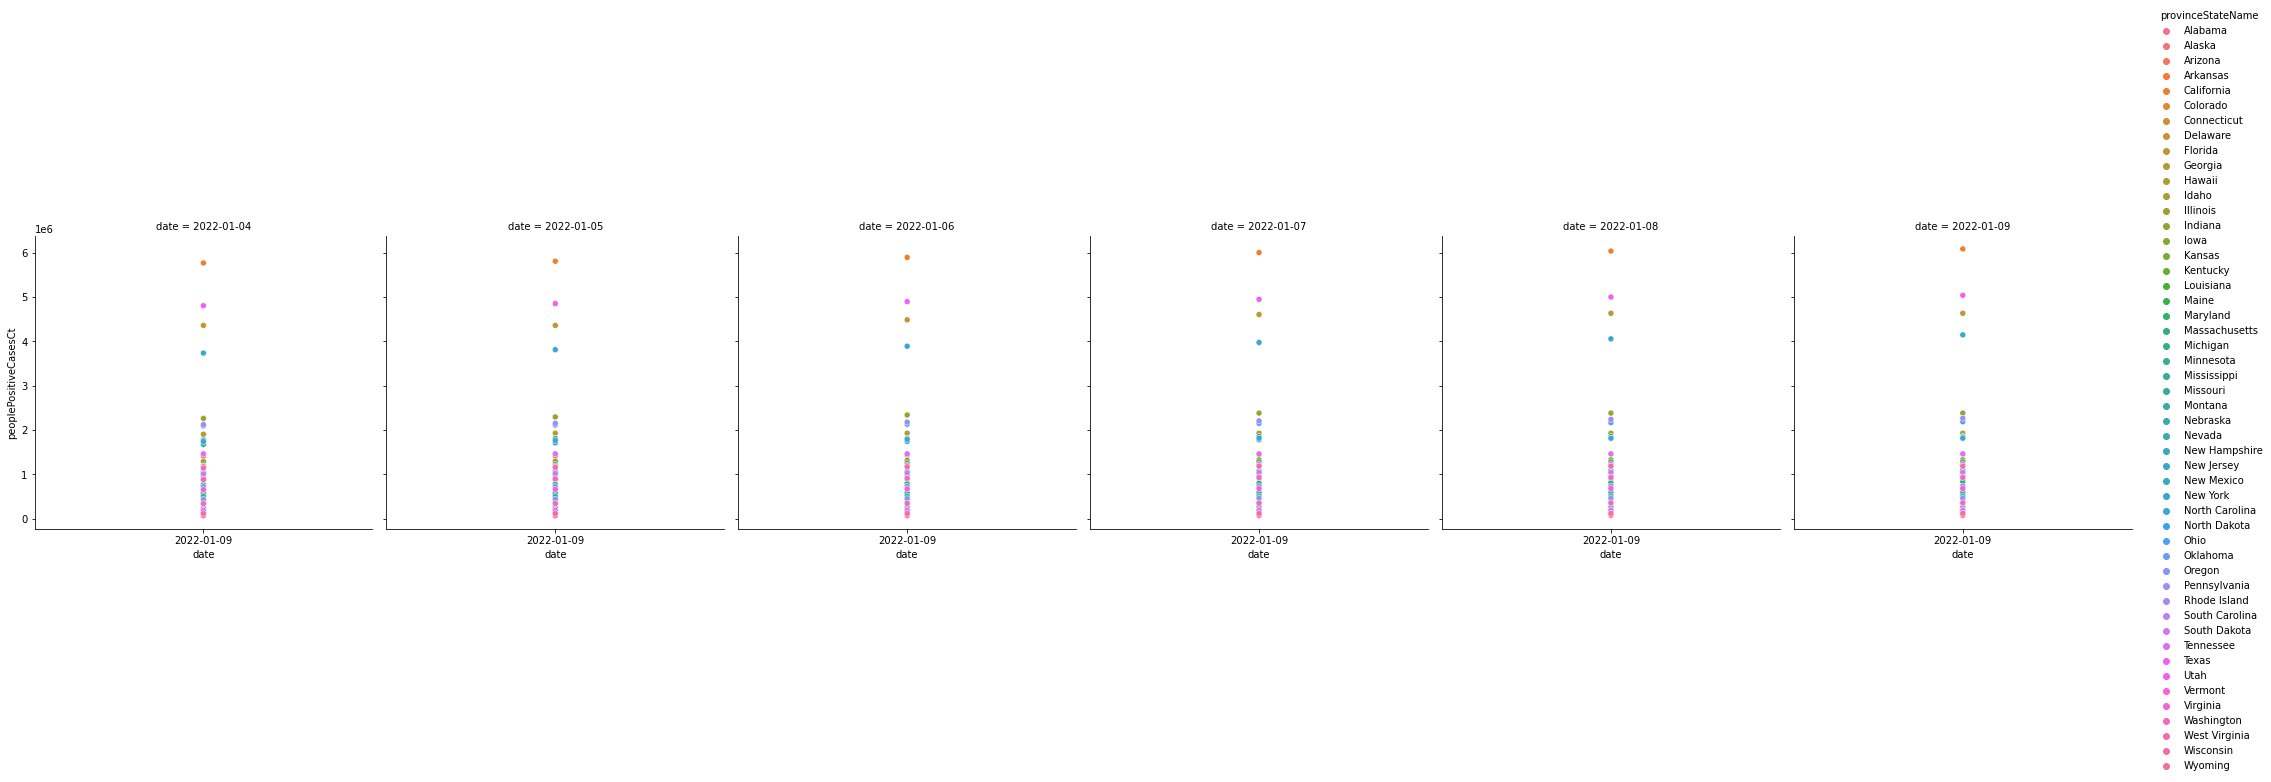

In [158]:
sns.relplot(x="date", y="peoplePositiveCasesCt",hue = 'provinceStateName',col="date",data=state_data)
plt.savefig('general_COVID.png',dpi = 500)

In [68]:
state_data.date.unique()

array(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
       '2022-01-08', '2022-01-09'], dtype=object)

In [87]:
min(state_data[(state_data.provinceStateName == 'Alabama')]['deathCt'])

16496

In [141]:
def plot_figure(state_name = 'Alabama'):
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(111)
#     ax1 = ax[row][col]
    
    state_data[(state_data.provinceStateName == state_name)]['peoplePositiveCasesCt'].plot(ax=ax1,style= 'bD--',alpha=0.8,label = 'Positive cases')
    plt.xticks(np.arange(6))
    plt.xlabel('date')            
    ax1.set_xticklabels(state_data[:6].date)
    # ax1.set_yticks(np.arange(0,0.9,0.1))        # 设置左边纵坐标刻度
    ax1.set_ylabel('Positive cases daily')                  # 设置左边纵坐标标签
    plt.legend(loc=2,fontsize = 10)                 # 设置图例在左上方

    ax2 = ax1.twinx()
    state_data[(state_data.provinceStateName == state_name)]['deathCt'].plot(ax=ax2,style= 'y>-.',alpha=0.8,label = 'death')
    # df['净流入人口/常住人口'].plot(ax=ax2,grid=True,label='净流入人口/常住人口',style='',alpha=0.7)
    start = round(min(state_data[(state_data.provinceStateName ==state_name)]['deathCt'])*0.999,0)
    end = round(max(state_data[(state_data.provinceStateName == state_name)]['deathCt'])*1.001,0)
    ax2.set_yticks(np.linspace(start,end,7))    # 设置右边纵坐标刻度
    # ax2.set_ylabel('death')       # 设置右边纵坐标标签
    plt.legend(loc=1,fontsize = 10)                # 设置图例在右上方
    plt.title(state_name)    # 给整张图命名

    # plt.savefig('江苏历年城镇化率.png', dpi=400, bbox_inches='tight') 

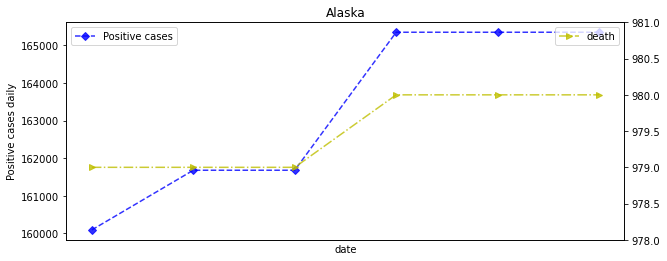

In [142]:
plot_figure('Alaska')

<ipython-input-141-b6654b20c478>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,4))


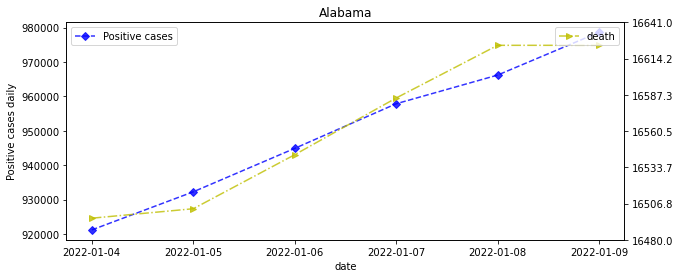

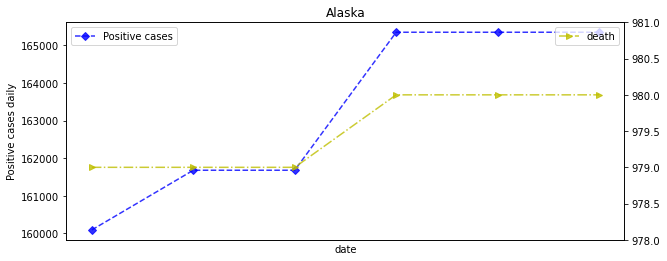

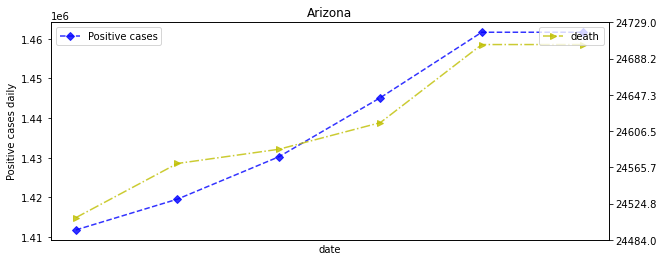

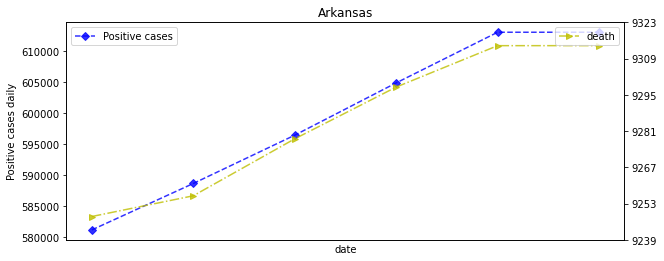

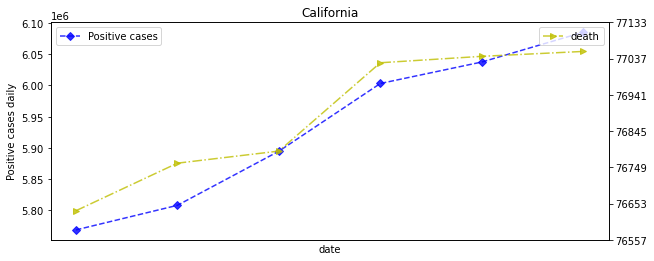

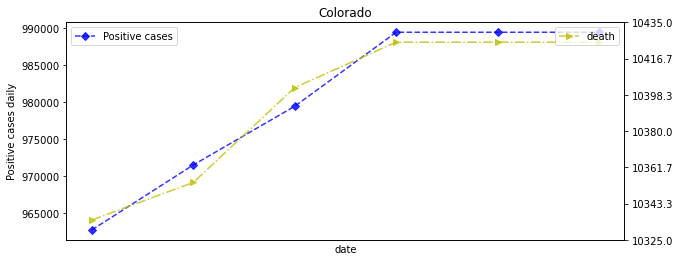

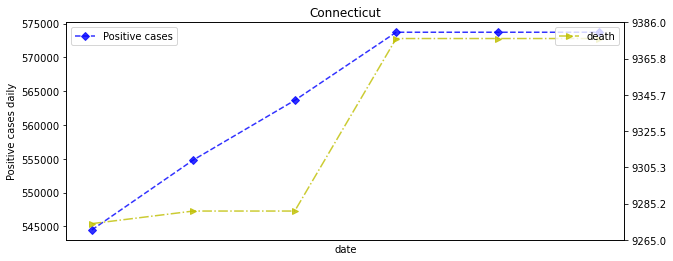

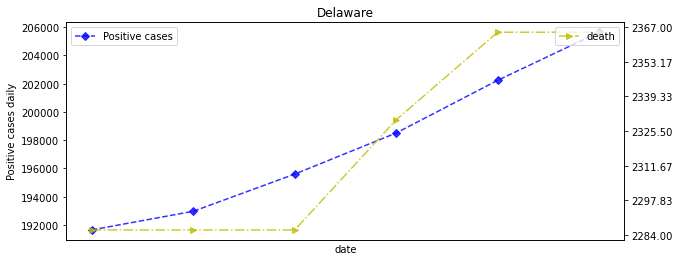

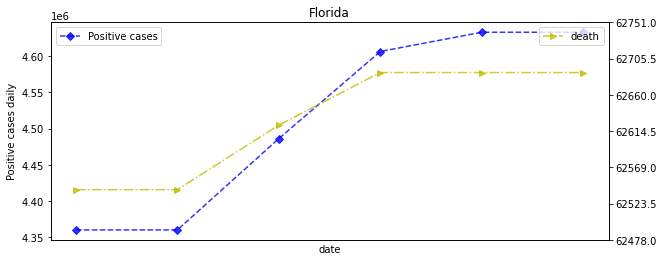

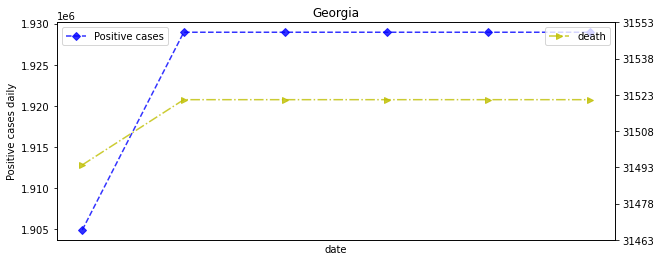

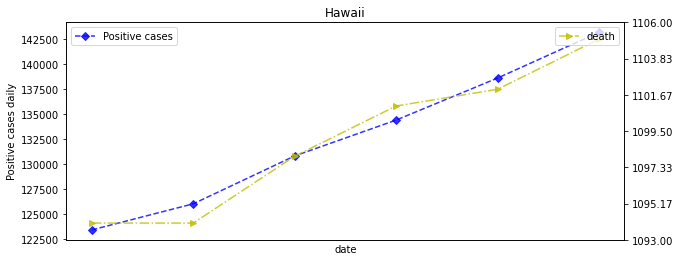

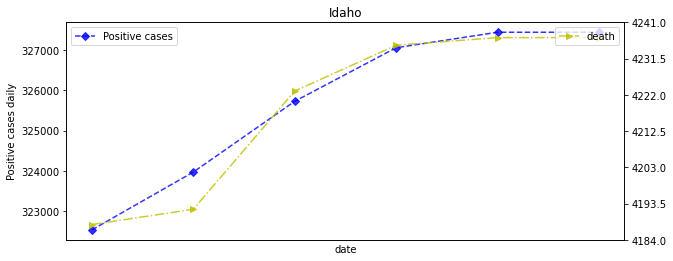

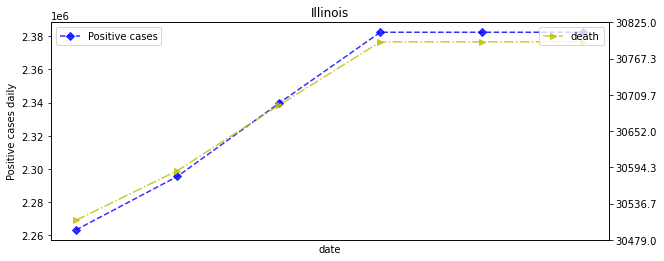

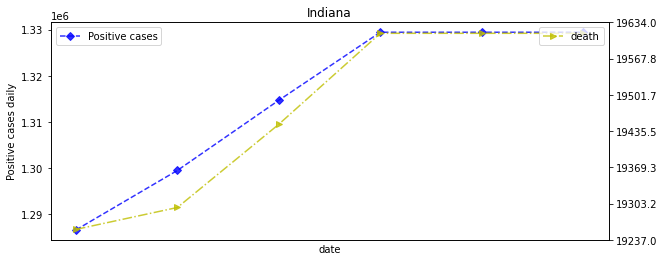

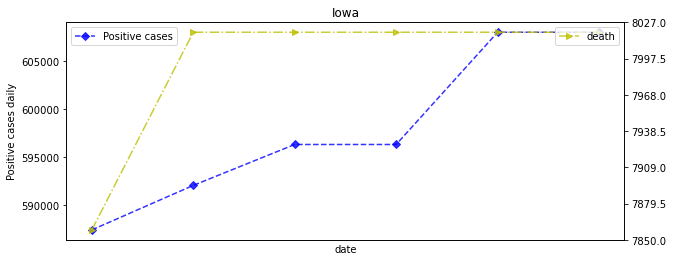

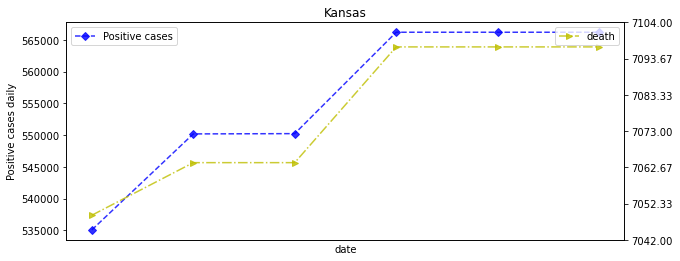

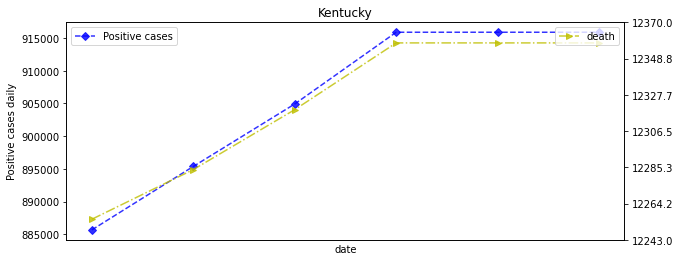

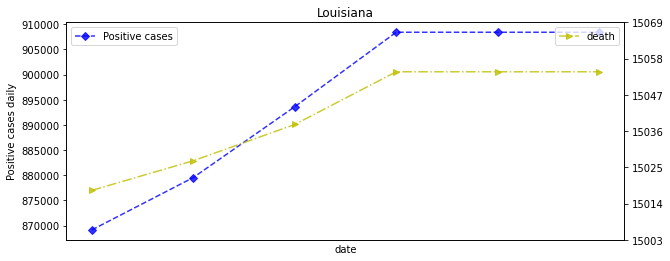

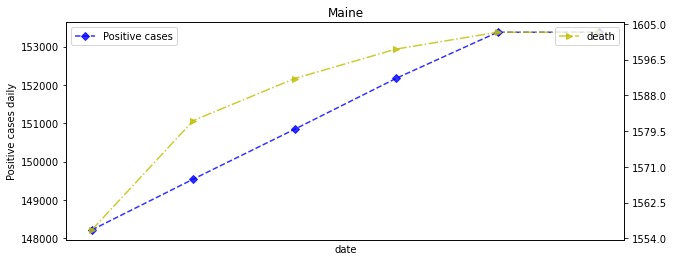

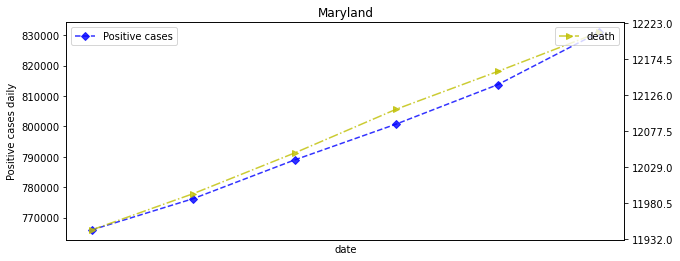

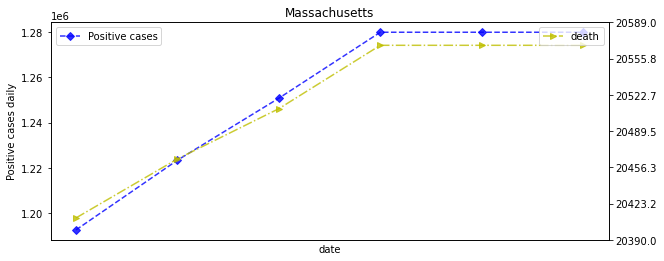

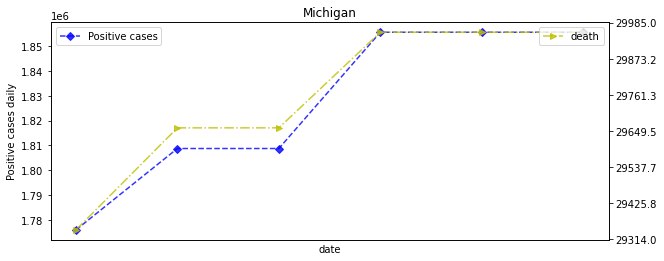

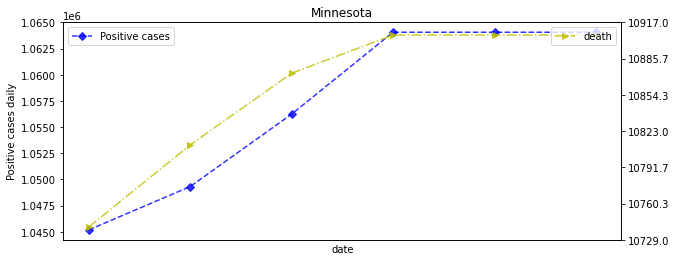

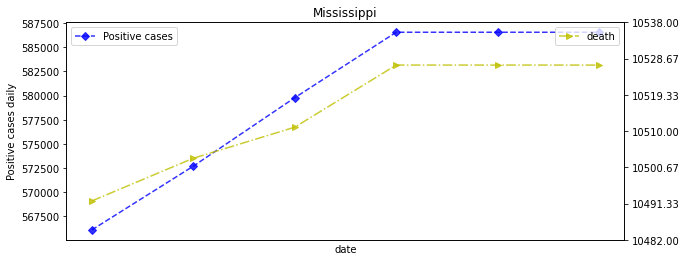

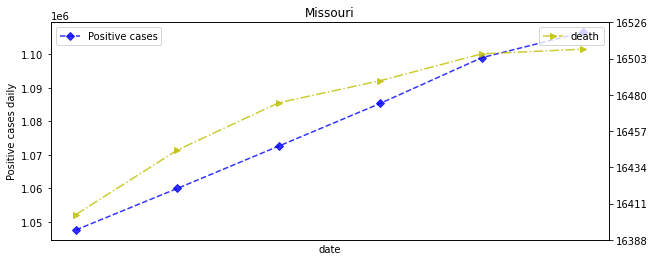

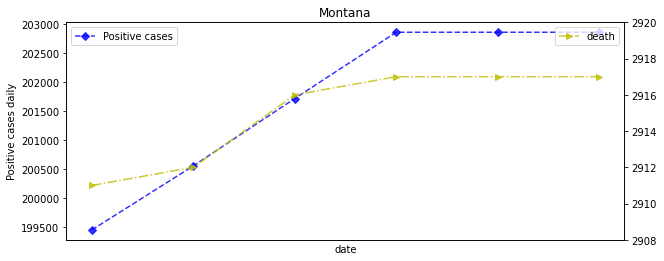

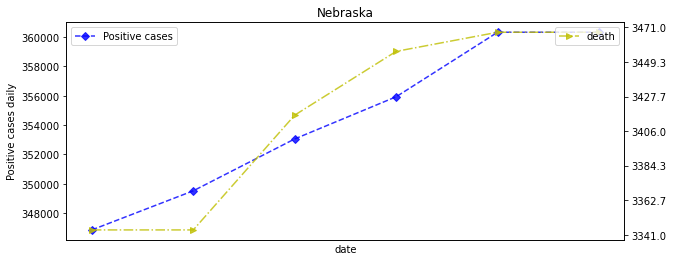

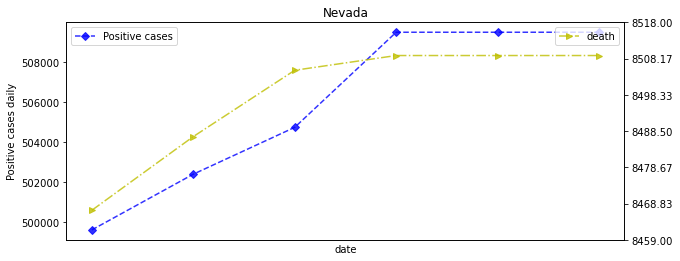

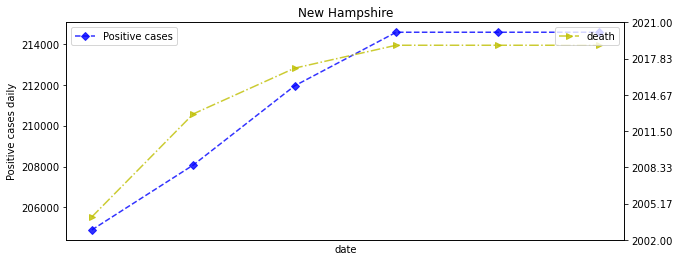

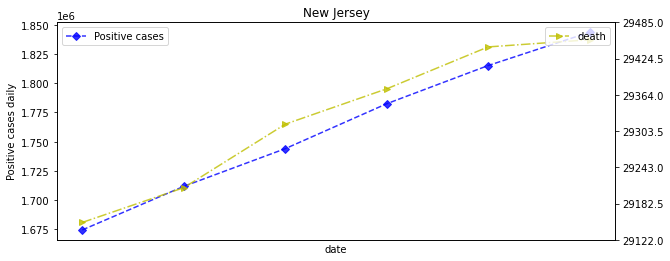

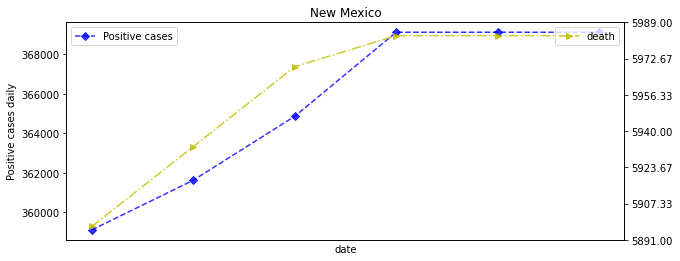

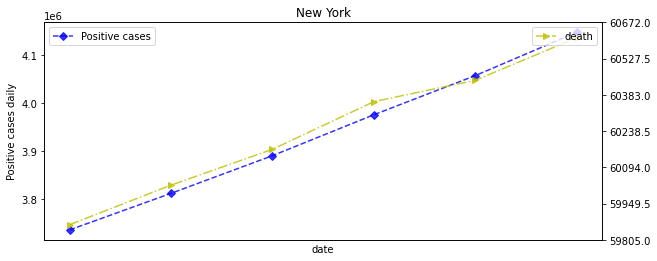

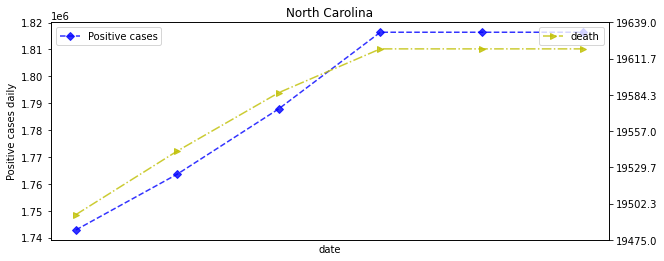

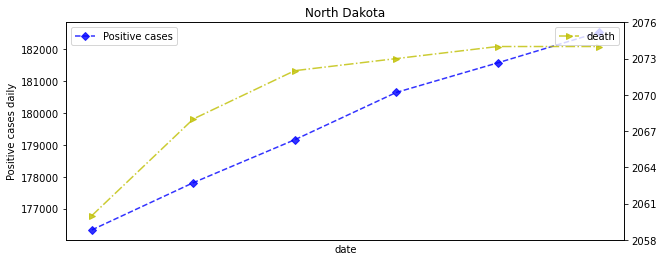

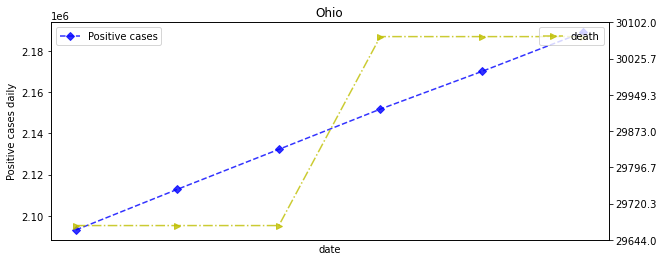

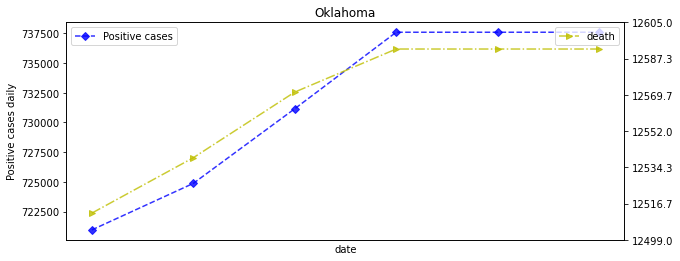

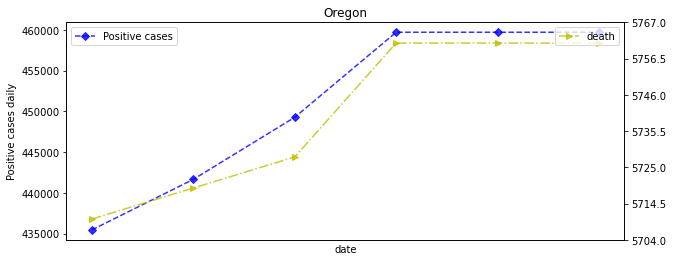

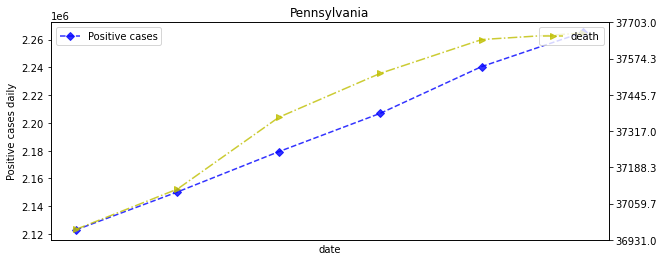

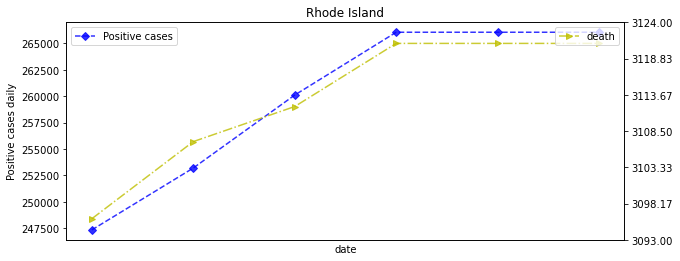

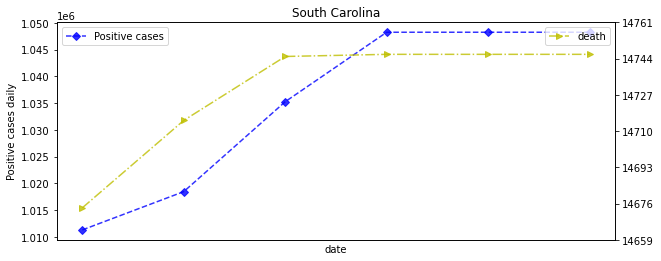

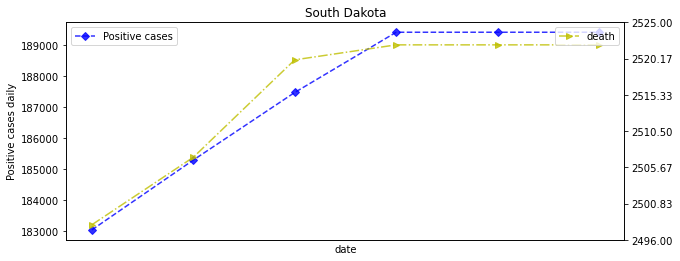

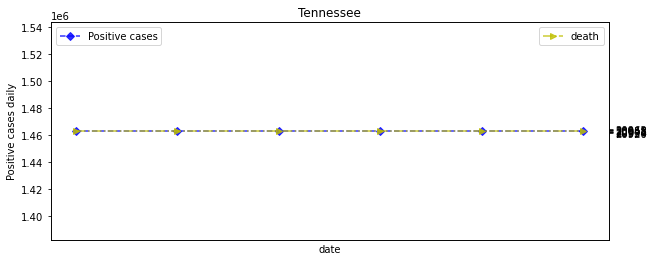

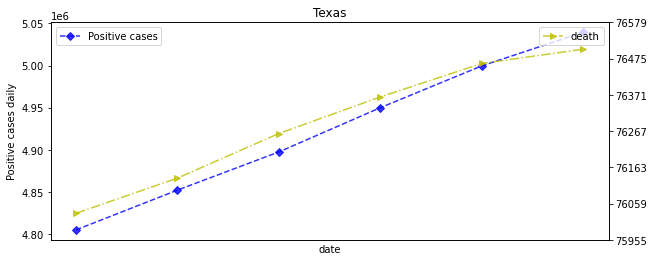

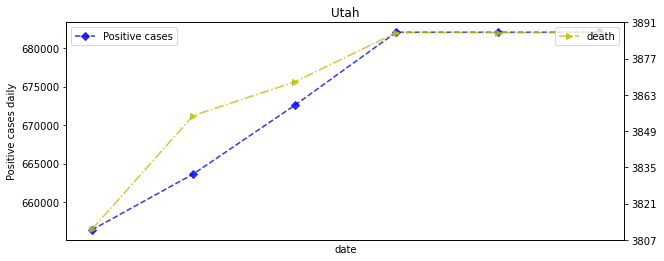

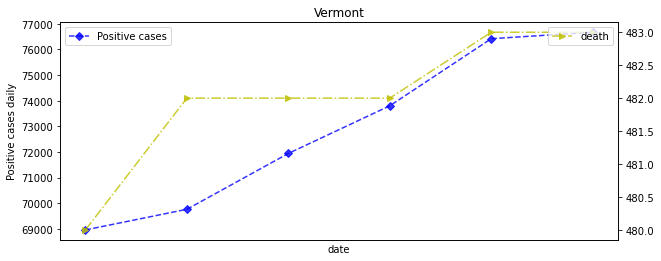

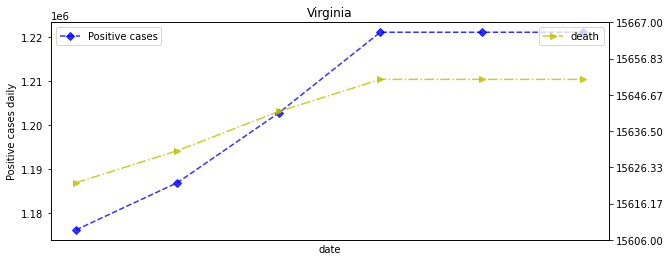

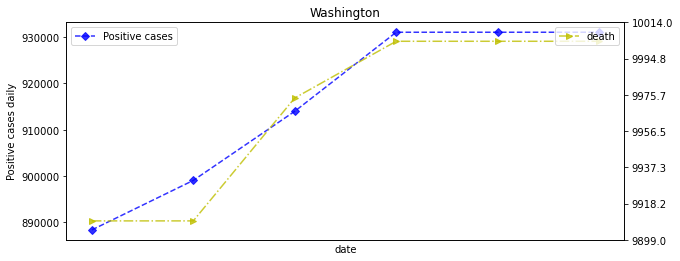

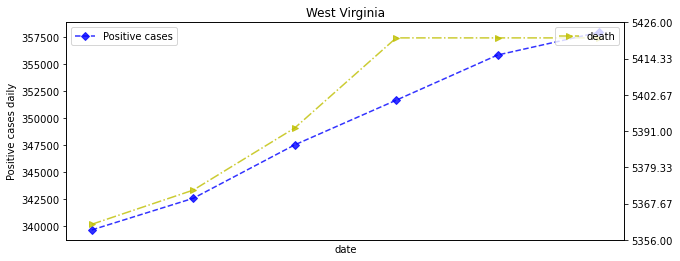

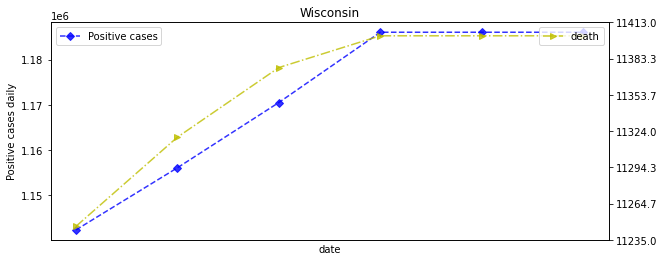

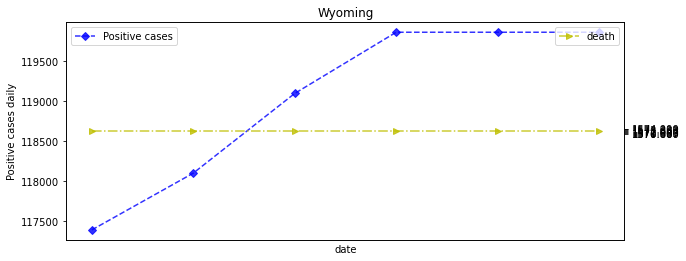

In [144]:
for i in range(state_data['provinceStateName'].nunique()):
    state_name = state_data['provinceStateName'].unique()[i]
#     plot_figure(state_name,row = i//2,col = i%2)
    plot_figure(state_name)
plt.savefig('COVID.png', dpi=400, bbox_inches='tight')  

## Heatmap

In [155]:
posi=pd.read_csv('location_county.csv')#读取文件中的信息
# num=314 
lat=np.array(posi['Lat'])#选取纬度信息
lon=np.array(posi['Long_'])#选取经度信息
name = np.array(posi['Admin2'])

In [156]:
data1=[[lat[i],lon[i],name[i]] for i in range(posi.shape[0])]#生成热力图需要的经纬度坐标
data1

[[32.53952745, -86.64408227, 'Autauga'],
 [30.72774991, -87.72207058, 'Baldwin'],
 [31.868263, -85.3871286, 'Barbour'],
 [32.99642064, -87.1251146, 'Bibb'],
 [33.98210918, -86.56790593, 'Blount'],
 [32.10030533, -85.71265535, 'Bullock'],
 [31.75300095, -86.68057478, 'Butler'],
 [33.77483727, -85.82630386, 'Calhoun'],
 [32.91360079, -85.39072749, 'Chambers'],
 [34.17805983, -85.60638968, 'Cherokee'],
 [32.85044126, -86.7173256, 'Chilton'],
 [32.02227341, -88.2656443, 'Choctaw'],
 [31.68099859, -87.83548597, 'Clarke'],
 [33.26984193, -85.85836077, 'Clay'],
 [33.67679204, -85.52005899, 'Cleburne'],
 [31.39932826, -85.98901039, 'Coffee'],
 [34.69847452, -87.80168544, 'Colbert'],
 [31.43401703, -86.99320044, 'Conecuh'],
 [32.93690146, -86.24847739, 'Coosa'],
 [31.2477854, -86.45050893, 'Covington'],
 [31.72941803, -86.31593104, 'Crenshaw'],
 [34.13020303, -86.86888037, 'Cullman'],
 [31.43037123, -85.61095742, 'Dale'],
 [32.32688101, -87.1086671, 'Dallas'],
 [34.45946862, -85.80782906, 'DeKa

In [157]:
# map_osm=folium.Map(location=[35,-90],zoom_start=5)
map_osm=folium.Map(location=[35.3, -97.6],zoom_start=4)
marker_cluster = MarkerCluster().add_to(map_osm)

# # add data point to the mark cluster
for lat, lon, name in data1:
    folium.Marker(
        location=[lat, lon],
        icon=None,
        popup=name,
    ).add_to(marker_cluster)

# add marker_cluster to map
map_osm.add_child(marker_cluster)